# 머신 러닝

### 문제 1. 자전거 대여 수요(count) 예측

#### 주요 Feature 설명 : bike_train.csv
***
- datatime : 날짜

- season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

- holiday : 1 = 주말 및 휴일, 0 = 평일

- workingday: 1 = 주중, 0 = 주말 및 휴일

- weather : 1 = 맑음, 약간 구름 낀 흐림, 2 = 안개, 안개 + 흐림, 3 = 가벼운 눈, 가벼운 비 + 천둥, 4 = 심한 눈/비, 천둥/번개

- temp : 온도(섭씨)

- atem : 체감 온도(섭씨)

- humidity : 상대 습도

- windspeed : 풍속

- casual : 미등록 사용자 대여수

- registered : 등록된 사용자 대여수

- count : 대여 횟수(casual + registered)
***

### 1-1) Train 데이터셋을 이용하여 탐색적 데이터 분석을 시행 하고, 시각화와 함께 그 결과에 대해 논하시오

In [ ]:
from pandas import read_csv
bike = read_csv('bike_train.csv')
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


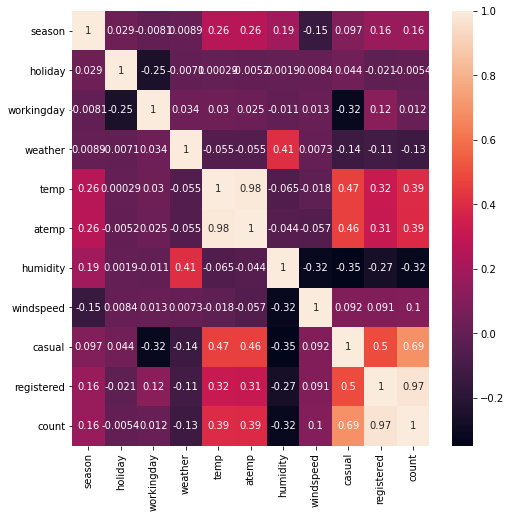

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(bike.corr(), annot=True)
plt.show() #큰 상관성을 보이는 feature들은 없는 것으로 보임

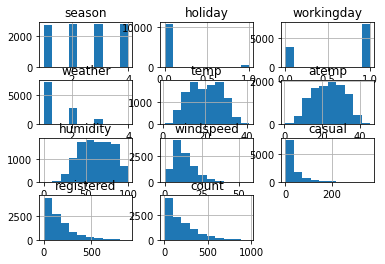

In [ ]:
bike.hist()
plt.show()

### 1-2) Train 데이터 셋을 8:2 비율로 데이터를 분할하고, 전처리를 수행하시오 

In [ ]:
#datetime은 의미가 없어서 삭제, holiday와 workingday는 겹치는 feature라고 생각해서 한개 drop함
#registered와 casual도 count랑 중복이라고 생각해서 drop
bike2 = bike.drop(['datetime', 'workingday', 'casual', 'registered'], axis=1)

from sklearn.model_selection import train_test_split
X = bike2.drop(['count'], axis=1)
y = bike2['count']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head(3)

,season,holiday,weather,temp,atemp,humidity,windspeed
8090,2,0,1,25.42,31.060,57,7.0015
4762,4,1,1,13.94,14.395,42,31.0009
3498,3,0,1,30.34,34.090,55,22.0028


### 1-3) Ridge 회귀분석을 수행하는데, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from pandas import DataFrame

alphas = np.arange(0.0, 1.1, 0.1)
r2 = []
rmse = []
for a in alphas:
    fitted = Ridge(alpha=a).fit(X_train, y_train)
    score1 = fitted.score(X_test, y_test) #r2
    pred = fitted.predict(X_test)
    score2 = np.sqrt(mse(y_test, pred)) #rmse
    r2.append(score1)
    rmse.append(score2)

result = DataFrame({"alpha":alphas, 'R2':r2, 'RMSE':rmse}) 
result

,alpha,R2,RMSE
0,0.0,0.253709,155.611918
1,0.1,0.253709,155.611907
2,0.2,0.253709,155.611896
3,0.3,0.253709,155.611886
4,0.4,0.253709,155.611875
5,0.5,0.253709,155.611865
6,0.6,0.253709,155.611854
7,0.7,0.253709,155.611843
8,0.8,0.253709,155.611833
9,0.9,0.253709,155.611822


### 1-4) 마찬가지로 Lasso 회귀분석을 수행하고, 0~1까지 0.1간격으로 alpha를 조절하여 만든 모델중 ${R}^2$ 최적인 모델에 대해 1-2)에서 분할된 test set으로 예측한 값들에 대해 ${R}^2$와 RMSE를 구하시오

In [ ]:
from sklearn.linear_model import Lasso
alphas = np.arange(0.0, 1.1, 0.1)
r2 = []
rmse = []
for a in alphas:
    fitted = Lasso(alpha=a).fit(X_train, y_train)
    score1 = fitted.score(X_test, y_test) #r2
    pred = fitted.predict(X_test)
    score2 = np.sqrt(mse(y_test, pred)) #rmse
    r2.append(score1)
    rmse.append(score2)

result = DataFrame({"alpha":alphas, 'R2':r2, 'RMSE':rmse}) 
result

<ipython-input-10-fa3ed1aa363c>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  fitted = Lasso(alpha=a).fit(X_train, y_train)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99060796.18658061, tolerance: 26883.505559382647
  model = cd_fast.enet_coordinate_descent(


,alpha,R2,RMSE
0,0.0,0.253709,155.611918
1,0.1,0.253765,155.606035
2,0.2,0.253808,155.601597
3,0.3,0.253853,155.596813
4,0.4,0.253913,155.590568
5,0.5,0.253971,155.584580
6,0.6,0.254025,155.578883
7,0.7,0.254077,155.573460
8,0.8,0.254127,155.568310
9,0.9,0.254173,155.563435


### 1-5) 3가지 회귀 트리 모델을 선택하여 모형 학습 및 예측/변수 중요도를 시각화를 하시오        

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
#변수 중요도
features = X_train.columns
feat_imp = DataFrame(columns=features, index=['rf', 'gb', 'extra'])

for name, estimator in zip(['rf', 'gb', 'extra'], [RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor]):
    fitted = estimator().fit(X_train, y_train)
    for feat, imp in zip(features, fitted.feature_importances_):
        feat_imp.loc[name, feat] = imp
feat_imp

,season,holiday,weather,temp,atemp,humidity,windspeed
rf,0.07411,0.009659,0.054873,0.147988,0.234388,0.269474,0.209508
gb,0.100079,0.002738,0.011311,0.20311,0.304149,0.35298,0.025633
extra,0.074891,0.01099,0.048804,0.187009,0.149121,0.287788,0.241397


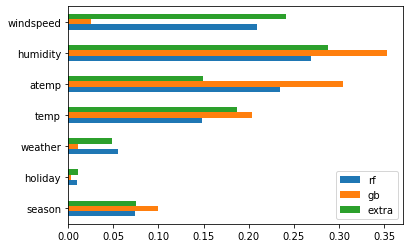

In [ ]:
#3개의 분류기 모두 humidity의 중요도를 가장 높게 보고, holiday의 중요도를 가장 낮게 보았음
feat_imp.T.plot(kind='barh')
plt.show()

In [ ]:
#예측 중요도 (정확도)
feat_acc = DataFrame(columns=features, index=['rf', 'gb', 'extra'])
for name, estimator in zip(['rf', 'gb', 'extra'], [RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor]):
    fitted = estimator().fit(X_train, y_train)
    score = fitted.score(X_test, y_test) #전체 feat의 R2
    for feat in features:
        X_train_feat = X_train.drop([feat], axis=1) #feat을 돌아가며 제거
        X_test_feat = X_test.drop([feat], axis=1)
        fitted = estimator().fit(X_train_feat, y_train)
        score_feat = fitted.score(X_test_feat, y_test) #feat 없을때의 R2
        feat_acc.loc[name, feat] = score - score_feat #많이 줄을수록 예측중요도가 높음
feat_acc

,season,holiday,weather,temp,atemp,humidity,windspeed
rf,0.085751,0.005725,0.04366,-0.003483,0.000383,0.080241,0.027808
gb,0.022056,0.002042,0.001184,0.003551,-0.001292,0.050874,0.004827
extra,0.132781,0.010421,0.071214,-0.004982,0.002931,0.0645,-0.009899


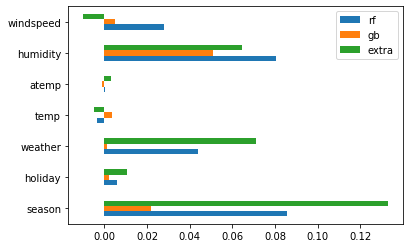

In [ ]:
# 세개 분류기 평균적으로는 humidity의 예측 중요도가 가장 높은 것으로 나옴
# extratree와 gb는 그다음으로 season이 예측 중요도가 높음
feat_acc.T.plot(kind='barh')
plt.show()

# 통계 분석

## 문제 2. 시계열 분석 - 삼성전자 종가(Close) 예측

### 주요 Feature 설명 : samsung.csv
***
Close: 종가 - 주식 시장이 마감했을 때의 가격

Open: 시가 - 주식 시장이 시작했을 때의 가격

High: 최고가

Low: 최저가

Volume: 거래량

Change: 증감률 - 어제 종가 대비 오늘 종가의 증감률
***

### 2-1) EDA 및 전처리를 수행 하시오

In [ ]:
from pandas import read_csv
df = read_csv("samsung.csv")
df.describe()

,Open,High,Low,Close,Volume,Change
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000
mean,66981.355932,67675.302663,66312.953995,66953.510896,2.147010e+07,0.000873
std,13367.888858,13439.795465,13358.538159,13366.136244,9.792911e+06,0.018508
min,42600.000000,43550.000000,42300.000000,42500.000000,8.330969e+06,-0.063877
25%,55700.000000,56300.000000,54900.000000,55500.000000,1.495092e+07,-0.009926
50%,61100.000000,61500.000000,60500.000000,61000.000000,1.871666e+07,0.000000
75%,81100.000000,81500.000000,80600.000000,81000.000000,2.510836e+07,0.010017
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


In [ ]:
df['Date'] = df['Date'].astype('Datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    413 non-null    datetime64[ns]
 1   Open    413 non-null    int64         
 2   High    413 non-null    int64         
 3   Low     413 non-null    int64         
 4   Close   413 non-null    int64         
 5   Volume  413 non-null    int64         
 6   Change  413 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 22.7 KB


In [ ]:
df = df.set_index('Date')
df = df.resample('D').asfreq() #결측치 194개 확인
df.isna().sum()

Open      194
High      194
Low       194
Close     194
Volume    194
Change    194
dtype: int64

In [ ]:
df = df.interpolate() #결측치 보간!
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

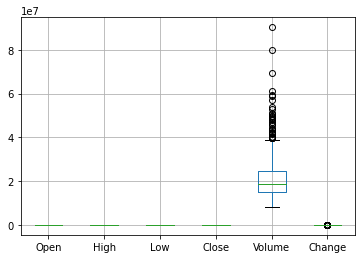

In [ ]:
#거래량에서 이상치가 보임
df.boxplot()
plt.show()

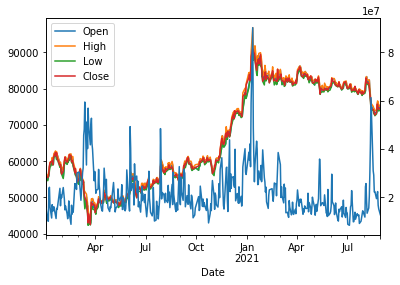

In [ ]:
#거래량과 가격들의 시계열 plot
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
df.drop(['Volume', 'Change'], axis=1).plot(ax=ax)
df['Volume'].plot(ax=ax2)
plt.show()

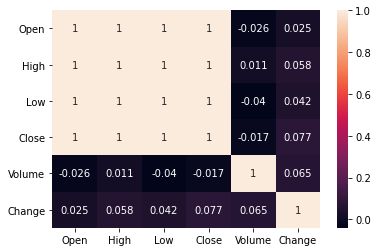

In [ ]:
#상관분석 heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()
# 가격들 간의 상관관계가 높고, volume과 change는 상관관계가 거의 없어 보임

통계량 -1.00, pvalue 0.75
통계량 2.56, pvalue 0.01
차분 1회 ======================================================================
통계량 -22.28, pvalue 0.00
통계량 0.16, pvalue 0.10


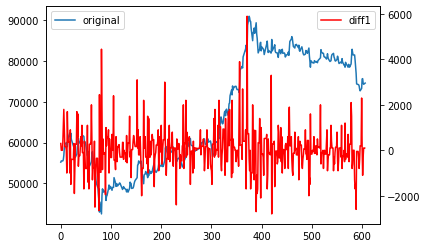

In [ ]:
# 정상성 확인 (필요시 차분, 변환 전처리)
from warnings import filterwarnings
filterwarnings('ignore')
close = df['Close'].values
close2 = df['Close'].diff(1).dropna().values
from statsmodels.tsa.stattools import adfuller, kpss
ad = adfuller(close) # H0: 단위근을 포함한다(비정상)
print("통계량 {:.2f}, pvalue {:.2f}".format(ad[0], ad[1]))
# H0을 기각할 수 없다!
kp = kpss(close) #H0: 정상과 차이가 없다(정상)
print("통계량 {:.2f}, pvalue {:.2f}".format(kp[0], kp[1]))

print("차분 1회", "="*70)
ad2 = adfuller(close2)
print("통계량 {:.2f}, pvalue {:.2f}".format(ad2[0], ad2[1]))
kp2 = kpss(close2) #H0: 정상과 차이가 없다(정상)
print("통계량 {:.2f}, pvalue {:.2f}".format(kp2[0], kp2[1]))
# 차분 한번을 통해 정상성 획득 !

fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
ax.plot(close)
ax2.plot(close2, color='red')
ax.legend(labels=['original'], bbox_to_anchor=(0.25,1))
ax2.legend(labels=['diff1'])
plt.show()

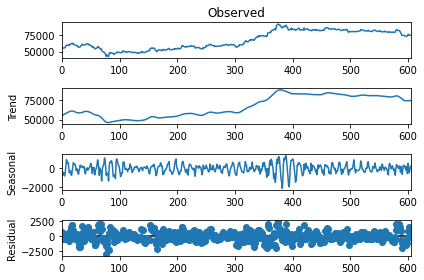

In [ ]:
# STL 분해를 통해 seasonality, Trend 확인
from statsmodels.tsa.seasonal import STL
fitted = STL(close, period=12).fit()
fitted.plot()
plt.show()
#Trend가 있고 계절성은 없는 것으로 보임

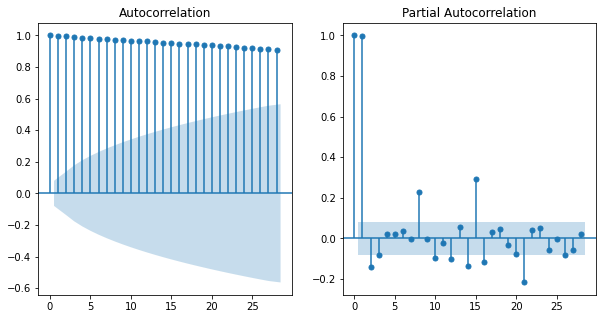

In [ ]:
# 자기상관 확인
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acfs = acf(close)
pacfs = pacf(close)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_acf(close, ax=ax[0])
plot_pacf(close, ax=ax[1])
plt.show()
#ACF 플롯을 통해 자기상관이 있음을 확인함: 전처리 필요
#PACF lag 2에서 절단점을 가지고, ACF는 절단점이 없는 것으로 보아 AR(1) 모형을 가질 것으로 예상

### 2-2) 데이터 셋을 7:3의 비율로 데이터를 분할 하고 , 시계열 분석을 수행하시오

In [ ]:
from pmdarima import auto_arima
print(auto_arima(close)) 
#수동으로 탐색적 분석한 결과와 동일하게 차분 1회만 하면 된다고 나옴

#1회 차분한 close2로 시계열 분석 수행
#시계열 데이터기 때문에 앞의 70% 데이터를 train, 뒤의 데이터를 test로 구분함
idx = int(len(df)*0.7)
close = DataFrame(close, index=df.index)
train = close.iloc[0: idx]
test = close[idx:]

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,0)).fit()
model.summary()

 ARIMA(1,1,0)(0,0,0)[0]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                  424
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3499.014
Date:                Sun, 29 May 2022   AIC                           7002.029
Time:                        14:27:58   BIC                           7010.123
Sample:                    01-02-2020   HQIC                          7005.227
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0356      0.033      1.091      0.275      -0.028       0.100
sigma2      8.957e+05   3.13e+04     28.580      0.000    8.34e+05    9.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):               606.26
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.00
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 2-3) 잔차 검정을 수행하고, 테스트 데이터를 예측 및 시각화를 수행 하시오

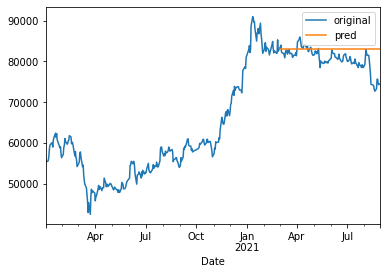

In [ ]:
# JB는 유의확률이 0.00이기 때문에 잔차가 정규성을 따르지 않는다고 본다
# LB는 유의확률이 0.45이기 때문에 자기 상관이 없다고 본다.

import datetime as dt
pred = model.predict(start=dt.datetime(2021,3,2), end = dt.datetime(2021,8,30), type='linear')

fig, ax = plt.subplots(1,1)
close.plot(ax=ax)
pred.plot(ax=ax)
ax.legend(labels=['original', 'pred'])
plt.show()

### 2-4) 테스트 데이터에 대한 평가지표 MAPE 값을 도출 하시오

<font size="5">$MAPE = \frac{100\%}{n}\sum_{t=1}^{n}\frac{\vert F_{t}-A_{t}\vert}{\vert A_{t} \vert}$</font>


In [ ]:
np.sum(np.abs(pred.values - test.values) / np.abs(test.values)) / len(test)

6.299141081283009

### 2-5) 모형 성능 개선을 하기 위해서 전략 및 구현을 하시오(ex: refresh)

In [ ]:
# 결측치 채우는 방법을 다른 방법으로 시도해 본다.
# 로그 변환을 통해 정상성을 확보해본다.
# seasonality를 고려해 SARIMAX 적합을 시도해본다

## 문제 3. 통계분석(명목형 변수 검정)

### 3개의 모델의 분류 결과 값에 대하여 모델의 분류 정확도 간에 차이가 있는지 검정 하시오

In [ ]:
import pandas as pd
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])
y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])
y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

data = pd.DataFrame({'y_true':y_true, 'model_1':y_model_1, 
                         'model_2':y_model_2, 'model_3':y_model_3 })

data

,y_true,model_1,model_2,model_3
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
95,0,0,0,0
96,0,0,0,0
97,0,0,0,0
98,0,0,0,1


In [ ]:
#H0: 각 모델의 정확도가 모두 같다
#H1: 각 모델 중 적어도 하나는 정확도가 차이가 있다

model1 = list(data['y_true']==data['model_1'])
model2 = list(data['y_true']==data['model_2']) 
model3 = list(data['y_true']==data['model_3']) 

table = DataFrame([model1, model2, model3], index=['m1', 'm2', 'm3']).T #범주를 columns으로 해야 함
print(table.head(3), "\n")

#패키지 계산
from statsmodels.stats.contingency_tables import cochrans_q
from scipy.stats import chi2
print(cochrans_q(table.values))

#수기 계산
n = table.shape[0] #표본 개수
k = table.shape[1] #범주 개수
df = k-1
k_sums= np.array(table.sum())
n_sums = np.array(table.sum(axis=1))
Q1 = k * sum(k_sums**2) - sum(k_sums)**2
Q2 = k * sum(n_sums) - sum(n_sums**2)
Q = df * Q1 / Q2
print("코크란 큐 검정 결과 통계량은 {:.3f}, pvalue는 {:.3f}이기 때문에 대립가설을 채택한다"
      .format(Q, 1- chi2.cdf(Q, df)))
# 귀무가설을 기각하고, 적어도 셋 중 하나는 정확도가 다르다!

      m1     m2     m3
0  False  False  False
1  False  False  False
2  False  False  False 

df          2
pvalue      0.023174427241061245
statistic   7.529411764705882
코크란 큐 검정 결과 통계량은 7.529, pvalue는 0.023이기 때문에 대립가설을 채택한다


## 문제4. 상관관계 분석
### 한 수출기업에서 원-달러 환율과 수출액 간의 관계를 분석하기 위하여 한 지점의 최근 10개월간의 데이터를 수집한 결과가 다음과 같다. (유의수준 5%)

아래 데이터는 4-1), 4-2)에서 사용 되는 데이터

|월|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|환율|1095|1110|1086|1074|1098|1105|1163|1124|1088|1064|
|수출액|53.655|57.72|52.128|52.626|54.9|56.355|58.15|57.324|53.312|51.072|


#### 문제 4-1) 환율과 수출액 간에 상관관계가 있는지 검정 하시오 

In [ ]:
from scipy.stats import pearsonr
X = [1095, 1110, 1086, 1074, 1098, 1105, 1163, 1124, 1088, 1064]
Y = [53.655, 57.72, 52.128, 52.626, 54.9, 56.355, 58.15, 57.324, 53.312, 51.072]
r, p = pearsonr(X, Y)
print("상관계수 {:.2f}, pvalue {:.2f}로 통계적으로 유의한 상관관계가 있다".format(r, p))

상관계수 0.88, pvalue 0.00로 통계적으로 유의한 상관관계가 있다


#### 문제 4-2) 환율과 수출액간의 상관계수가 0.9라고 할수 있는지 검정 하시오
***

In [ ]:
# H0: r = 0.9, H1 r!= 0.9
from scipy.stats import t
import numpy as np
r0 = 0.9
n = len(X)
df = n-2
T = np.sqrt(df) * (r-r0) / np.sqrt(1-r**2)
test_a = 0.05
p = 1-t.cdf(T, df)
print("[검정]", "="*70)
print("검정통계량 {:.3f}, 자유도 {}, pvalue {:.3f}".format(T, df, p))
from scipy.stats import t
print("유의수준 0.05 양측검정 시 임계치 {:.3f}~{:.3f}".format(
    t.ppf(test_a/2, df), 
    t.ppf(1-test_a/2, df)))
# H0을 기각할 수 없다 ! 즉, 환율과 수출액 간의 상관계수가 0.9라고 할 수 있다 !

[검정] ======================================================================
검정통계량 -0.113, 자유도 8, pvalue 0.543
유의수준 0.05 양측검정 시 임계치 -2.306~2.306


#### 문제 4-3) 어느 공장에서 작업자의 “결근횟수”와 “생산량”이 서로 상관관계가 있는지를 파악하는 중이다. 그래서 과거의 데이터를 분석해서 총 15개의 표본을 뽑았더니, 상관계수는 -0.45가 나왔다. 그럼 “결근횟수”와 “생산량”은 서로 상관관계가 있다고 할 수 있는지 유의수준 5%에서 검정하시오.

In [ ]:
# H0: r = 0, H1 r!= 0
n = 15
df = n-2
r = -0.45
r0 = 0
T = np.sqrt(df) * (r-r0) / np.sqrt(1-r**2)
test_a = 0.05

print("[검정]", "="*70)
print("검정통계량 {:.3f}, 자유도 {}".format(T, df))
print("유의수준 0.05 양측검정 시 임계치 {:.3f}~{:.3f}".format(
    t.ppf(test_a/2, df), 
    t.ppf(1-test_a/2, df)))
# 검정통계량이 채택역에 위치해있기 때문에 영가설을 기각할 수 없고, 상관관계가 없다!

[검정] ======================================================================
검정통계량 -1.817, 자유도 13
유의수준 0.05 양측검정 시 임계치 -2.160~2.160


## 문제 5 회귀분석 (문제 4번의 환율과 수출액간의 데이터를 이용)
#### 5-1) 환율을 독립변수, 수출액을 종속변수로 놓고 추정된 회귀식 및 회귀 모형을 검정 하시오

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

from pandas import DataFrame
X = np.array([1095, 1110, 1086, 1074, 1098, 1105, 1163, 1124, 1088, 1064])
Y = np.array([53.655, 57.72, 52.128, 52.626, 54.9, 56.355, 58.15, 57.324, 53.312, 51.072])

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
coef = model.params
print("회귀식: Y = X * {:.5f} + {:.5f}".format(coef[1], coef[0]))
print("회귀모형의 F통계량: 27.79, pvalue: 0.00으로 통계적으로 유의한 회귀모델로 볼 수 있고, 독립변수 환율의 회귀계수 {:.5f} 대해 t통계량 5.272 pvalue: 0.001로 통계적으로 유의한 회귀계수로 볼 수 있다.".format(coef[1]))
X = np.array([1095, 1110, 1086, 1074, 1098, 1105, 1163, 1124, 1088, 1064])
model.summary()

회귀식: Y = X * 0.08002 + -33.35766
회귀모형의 F통계량: 27.79, pvalue: 0.00으로 통계적으로 유의한 회귀모델로 볼 수 있고, 독립변수 환율의 회귀계수 0.08002 대해 t통계량 5.272 pvalue: 0.001로 통계적으로 유의한 회귀계수로 볼 수 있다.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     27.79
Date:                Sat, 28 May 2022   Prob (F-statistic):           0.000753
Time:                        16:11:24   Log-Likelihood:                -15.468
No. Observations:                  10   AIC:                             34.94
Df Residuals:                       8   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.3577     16.712     -1.996      0.081     -71.896       5.181
x1             0.0800      0.015      5.272      0.001       0.045       0.115
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.523
Skew:                           0.456   Prob(JB):                        0.770
Kurtosis:                       2.349   Cond. No.                     4.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5-2) 위에서 구한 회귀식이 유용한지 아니면 유용하지 않는지 모형의 적합성 검정(분산분석)을 수행하시오

In [ ]:
#H0: 모든 회귀계수가 0이다, H1: 적어도 하나의 회귀계수는 0이 아니다.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = DataFrame({"X":X, 'Y':Y})
atable = anova_lm(ols("Y~X", data = df).fit())
atable
#F통계량과 pvalue로 보아 이 회귀식은 유용하다!

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,44.865380,44.86538,27.794022,0.000753
Residual,8.0,12.913678,1.61421,NaN,NaN


#### 5-3) 환율이 1200일때 예상되는 수출액에 대한 95% 신뢰구간과 95% 예측구간을 구하시오

In [ ]:
x = 1200
Xm = np.mean(X)
n = len(X)
conf_a = 0.05

resid = model.resid
pred_y = x * coef[1] + coef[0] #점추정량
s = np.std(resid, ddof=2)#잔차표본분산 

Xi = 0
SE = s * np.sqrt(1/n + (Xi-Xm)**2/sum((X-Xm)**2)) #점추정량의 표준오차
start = pred_y + t.ppf(conf_a/2, df=n-2)*SE
end = pred_y - t.ppf(conf_a/2, df=n-2)*SE

print("수출액의 점추정량: {:.3f}".format(pred_y))
print("수출액의 신뢰구간: {:.3f}~{:.3f}".format(start, end))

수출액의 점추정량: 62.671
수출액의 신뢰구간: 24.132~101.209


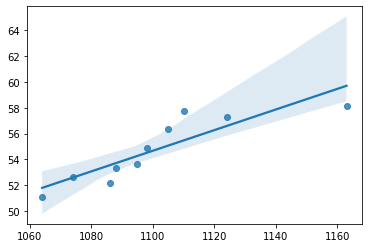

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.regplot(X, Y)
plt.show()